In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.feature_selection import r_regression, SelectKBest
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.decomposition import PCA
import pandas as pd

In [2]:
# Load data
train_X = pd.DataFrame(np.load('X_train.npy'))
train_Y = pd.DataFrame(np.load('Y_train.npy'))
test_X = pd.DataFrame(np.load('X_test.npy'))
test_Y = pd.DataFrame(np.load('Y_test.npy'))

# Impute missing values
imputer = IterativeImputer(random_state=42)
train_X_imputed = imputer.fit_transform(train_X)
test_X_imputed = imputer.transform(test_X) 
"""IterativeImputer is a module used to provide multivariate imputation to estimate each feature from all the others, it does this to input missing
feature values as a function of other features ina  round-robin fashion."""

# Convert the imputed data into dataframes 
train_X_imputed = pd.DataFrame(train_X_imputed, columns=train_X.columns)
test_X_imputed = pd.DataFrame(test_X_imputed, columns=test_X.columns)

In [3]:
# Normalization
minMaxScaler = MinMaxScaler(feature_range=(-1, 1))
train_X_normalized = minMaxScaler.fit_transform(train_X_imputed)
test_X_normalized = minMaxScaler.transform(test_X_imputed)  
"""MinMaxScaler transforms the features in a data set to be within a given range, in this case -1 to 1. This scales all data, including outliers,
down to a fixed range which cna be mroe easily managed."""

'MinMaxScaler transforms the features in a data set to be within a given range, in this case -1 to 1. This scales all data, including outliers,\ndown to a fixed range which cna be mroe easily managed.'

In [4]:
# Apply PCA
principleComponentAnalysis = PCA(n_components=2)
train_X_pca = principleComponentAnalysis.fit_transform(train_X_normalized)
test_X_pca = principleComponentAnalysis.transform(test_X_normalized)
"""PCA is a funciton used to apply principle component analysis on a data set, where the user can specify the number of dimensions they wish to
reduce to."""

explained_variance = principleComponentAnalysis.explained_variance_ratio_
print("Explained Variance: ", explained_variance)

Explained Variance:  [0.08857683 0.07245276]


In [5]:
k = 3 

# Apply K-means clustering
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(train_X_pca)
"""KMeans is a function used to distinguish k clusters in a data set, where k is specified by the user."""

C:\Users\Danie\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


'KMeans is a function used to distinguish k clusters in a data set, where k is specified by the user.'

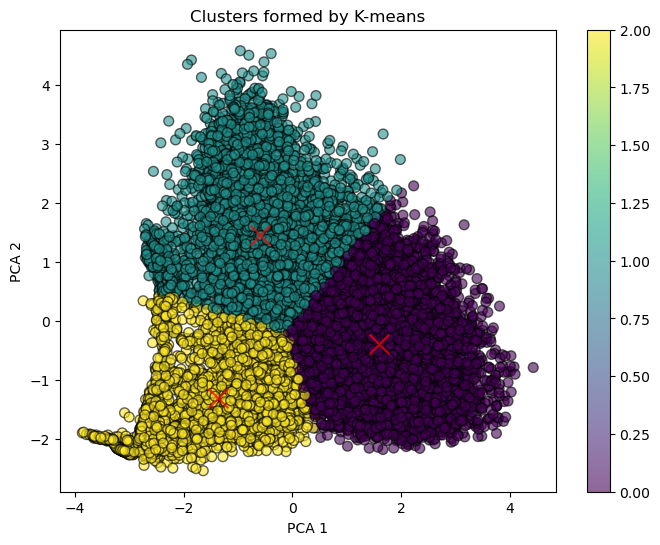

In [6]:
# Plotting the clusters
plt.figure(figsize=(8, 6))
scatter = plt.scatter(train_X_pca[:, 0], train_X_pca[:, 1], c=clusters, cmap='viridis', marker='o', edgecolor='k', s=50, alpha=0.6)

# Adding centroids to the plot
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='x')

# Adding titles and labels
plt.title('Clusters formed by K-means')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.colorbar(scatter)

# Show the plot
plt.show()


If the number of PCA components is increased to 3, then there will be more overlap between each cluster in the visualization, resulting in less defined clusters than when using 2 PCA components. This is because additional components might capture feature which are less significant than the features captured using only 2 PCA components, as a result there may be more overlap between clusters as more subtle variations are captured which discriminate less between groups. This redundant or irrelevant information might therefore make each group less distinct by seemingly introducing noise.  